In [7]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                 padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              3

In [18]:
import time

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data= (X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2422 - accuracy: 0.9218 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0358 - val_accuracy: 0.9884
Epoch 3/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0318 - val_accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0238 - val_accuracy: 0.9936
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0303 - val_accuracy: 0.9911
fit time :  280.3536078929901


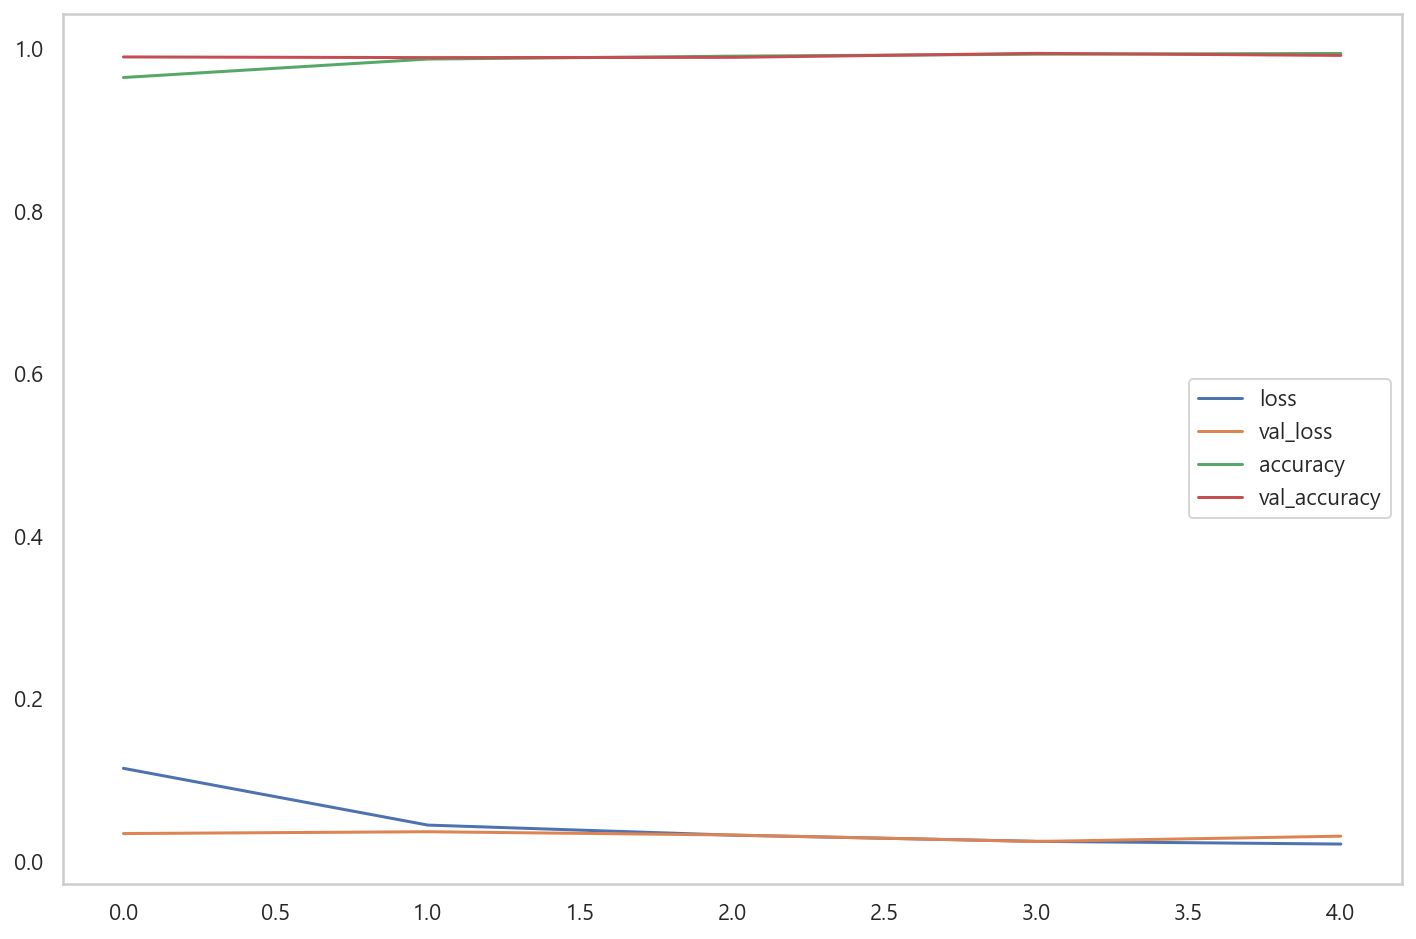

In [19]:
import matplotlib.pyplot as plt

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [21]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Train loss :', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0303 - accuracy: 0.9911
Test loss : 0.030342694371938705
Train loss : 0.991100013256073


In [23]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [25]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

89

In [26]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2135,
 659,
 883,
 3451,
 9850,
 381,
 3558,
 4761,
 160,
 1527,
 3976,
 1014,
 3762,
 115,
 5997,
 9729]

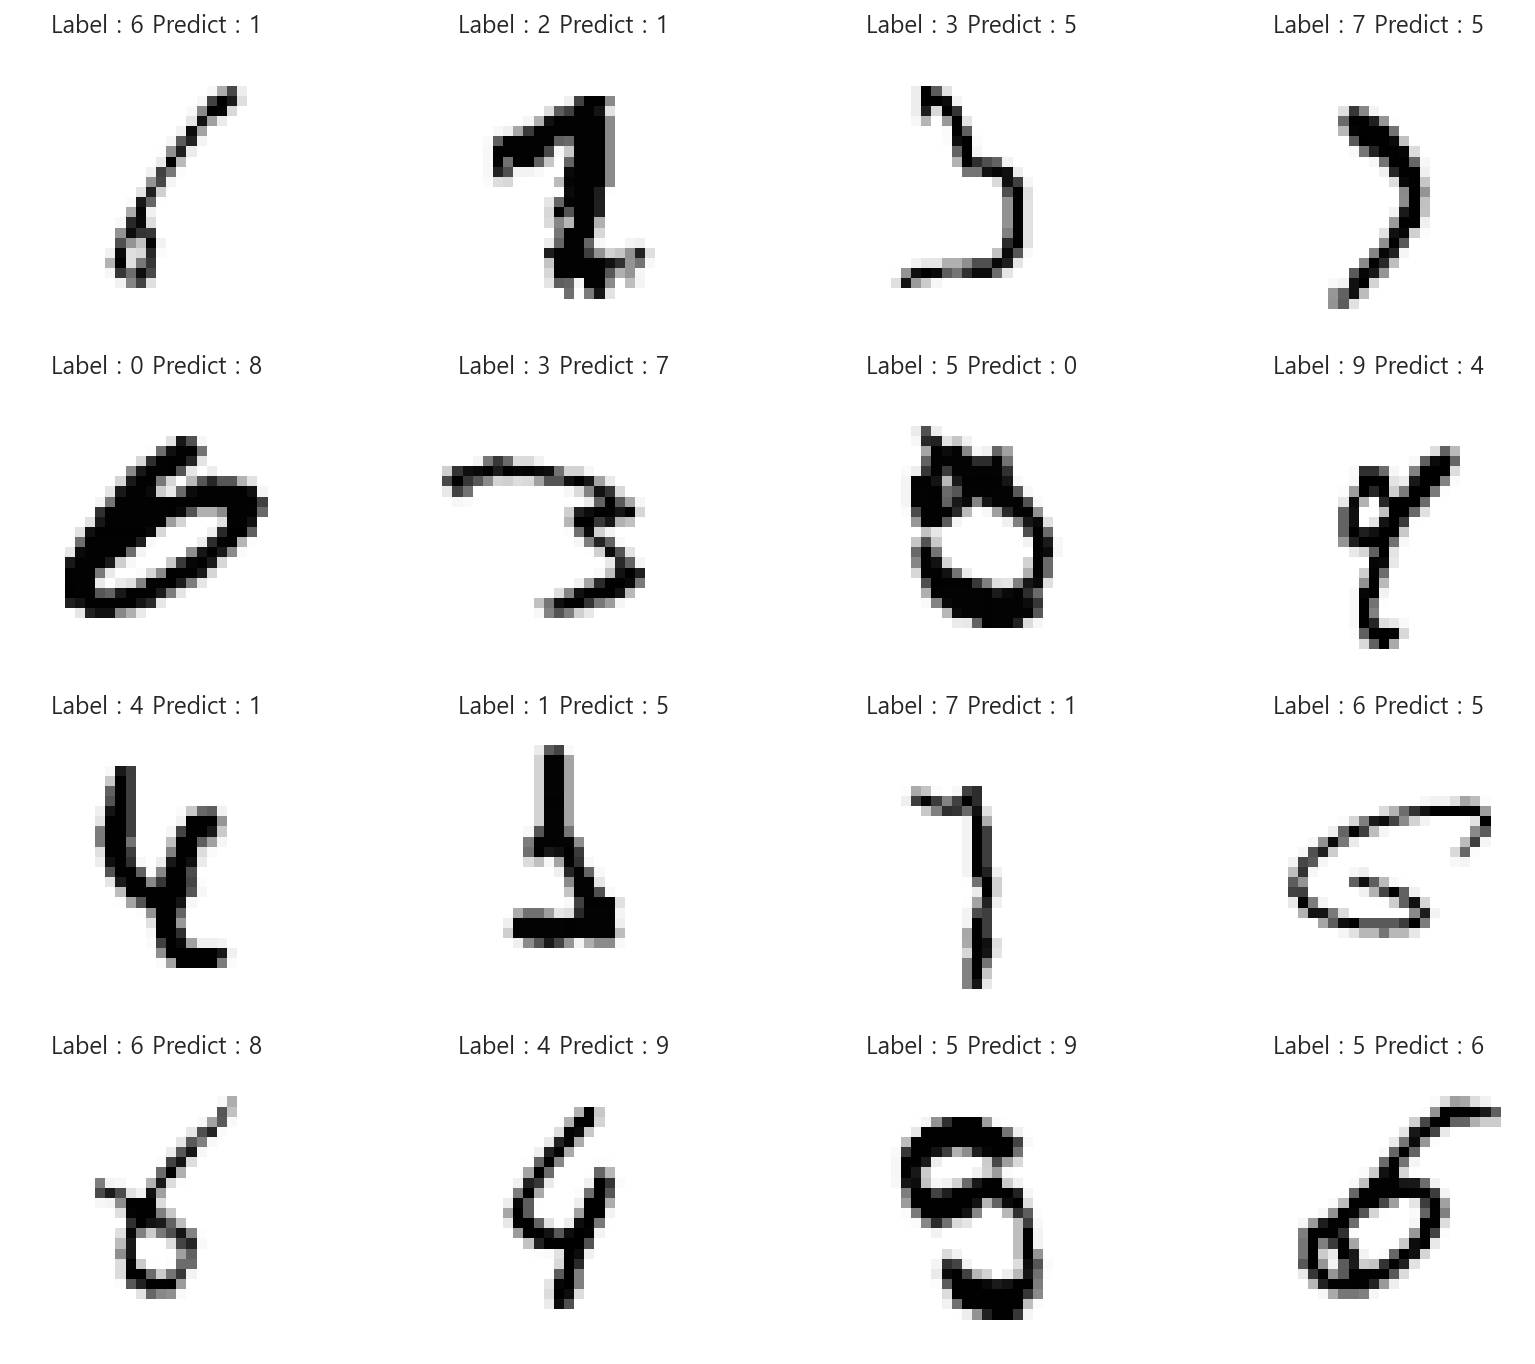

In [28]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')
plt.show()

In [29]:
model.save('MNIST_CNN_model.h5')